# The classification problem!

### k-Nearest Neighbors: Predict the label of a data point by
- looking at the 'k'closest labelled data points
- taking a majority vote



In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm
    target class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica


In [3]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
target_class={0:'Iris Setosa',1:'Iris Versicolour',2:'Iris Virginica'}

In [5]:
import matplotlib.pyplot as plt

#### Plot Petal Width and Lenght

In [6]:
petal_width = [ x[3] for x in iris.data ]
petal_lenght = [ x[2] for x in iris.data ]

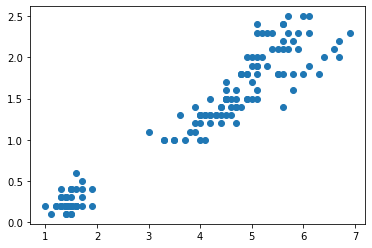

In [7]:
plt.scatter(petal_lenght,petal_width)

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.target[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [10]:
petal_width0 = [ x[3] for x in iris.data[:50] ]
petal_lenght0 = [ x[2] for x in iris.data[:50]  ]

petal_width1 = [ x[3] for x in iris.data[50:100] ]
petal_lenght1 = [ x[2] for x in iris.data[50:100] ]

petal_width2 = [ x[3] for x in iris.data[100:] ]
petal_lenght2 = [ x[2] for x in iris.data[100:] ]

In [11]:
len(petal_width0),len(petal_width1),len(petal_width2)

(50, 50, 50)

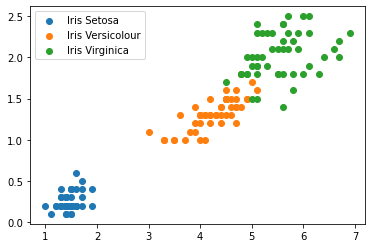

In [12]:
plt.scatter(petal_lenght0,petal_width0,label = target_class[0])
plt.scatter(petal_lenght1,petal_width1,label = target_class[1])
plt.scatter(petal_lenght2,petal_width2,label = target_class[2])
plt.legend(loc = 'best');

### Split the dataset into Train and Test!

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.25,
    random_state=3)

### Building the k-NN model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [24]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9473684210526315


### Predict the test dataset!

In [27]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [26]:
y_pred[:5]

array([0, 0, 0, 0, 0])

### Predict a new observation!


In [31]:
new_observation = [[4.6, 3.1 , 1.6, 0.4]]
prediction = knn.predict(new_observation)
print('Prediction: {} ({})'.format(target_class[int(prediction)],int(prediction)))

Prediction: Iris Setosa (0)


### Measuring the model Performance

> score(X, y[, sample_weight]): Return the mean accuracy on the given test data and labels.

> not always a useful metric, measure based on the correctly classified samples only.

### Confusion Matrix

**Precision, Recall, F1Score**

Precision=TP/ (TP+FP)

Recall=TP/ (TP+FN)

f1score 2* (precision*recall)/precision+recall

> F1-score: harmonic mean of the Precision and Recall:

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



### Overfitting/Underfitting

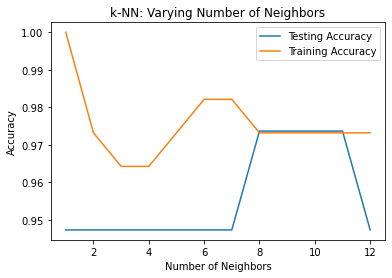

In [37]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Test accuracy is highest when using 8 neighbors. Using less than 8 neighbors seems to result in a simple model that overfits the data. More than 11 seems to be underfitting the data. 

> Larger k = smoother decision boundary = less complex model 

> Smaller k = more complex model = can lead to over tting